In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow import keras

In [2]:
def create_cnn_model(input_shape):
    
    # Create an Input layer
    inputs = Input(shape=input_shape)
    
    # Define the rest of the model architecture
    model = Sequential() 

    # Add convolutional layers
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output from the convolutional layers
    model.add(Flatten())

    # Add fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])   
    return model

In [3]:
def save_results(y_test, y_pred, X_test, file_path):
    import pandas as pd
    import numpy as np
    result_df = pd.DataFrame({'Test': y_test.argmax(axis=1), 'Pred': y_pred.argmax(axis=1)})
    result_df.to_csv(file_path + 'result.csv', index=False)
    import matplotlib.pyplot as plt
    # Display the first image in the testing set
    idx = np.random.randint(0, X_test.shape[0])
    plt.imshow(X_test[idx], cmap='gray')
    plt.axis('off')
    plt.title(f"Predicted as: {y_pred[idx].argmax()} with percentage of {y_pred[idx].max()*100:.0f}%")
    num = y_test[idx].argmax()
    plt.savefig(file_path + str(num) + '.png', dpi = 100, bbox_inches = 'tight')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9899 - loss: 0.0320
Test Loss: 0.027307266369462013
Test Accuracy: 0.9921000003814697


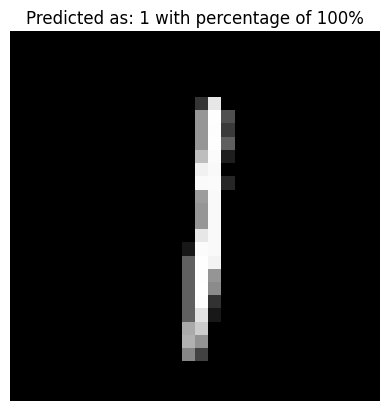

In [11]:
#using mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Convert the labels to one-hot encoded vectors
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

input_shape = (28,28,1) 
model = create_cnn_model(input_shape)
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1, verbose=0)
y_pred = model.predict(X_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

file_path = './results/mnist/'
save_results(y_test, y_pred, X_test, file_path)

(1554, 64, 64) (666, 64, 64) (1554,) (666,)
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4378 - loss: 1.7939
Test Loss: 1.8392817974090576
Test Accuracy: 0.402402400970459


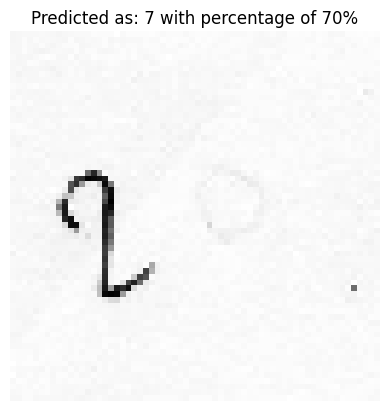

In [4]:
import os
import mmdigits
from sklearn.model_selection import train_test_split

# Specify the directory containing the dataset
dataset_dir = "./dataset/MM_digits/"
width = 64
height = 64
# Load the dataset
images, labels = mmdigits.load_dataset(dataset_dir)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Preprocess the data
X_train = X_train.reshape(-1, width, height, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, width, height,1).astype("float32") / 255.0

# Convert the labels to one-hot encoded vectors
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

input_shape = (width,height,1) 
model = create_cnn_model(input_shape)
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1, verbose=0)
y_pred = model.predict(X_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

file_path = './results/mmdigit/'
if not os.path.exists(file_path):
    os.makedirs(file_path)
save_results(y_test, y_pred, X_test, file_path)